In [2]:
# Course Code: AIB503
# Title of the ECA: Foundation to Python for AI
# SUSS PI No: CE171038
# Name: Ou Yang Yu
# Submission Date: 28 February 2025

In [212]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules for preprocessing, clustering, and evaluation
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [213]:
### Question 1a ###

In [214]:
# 1. Load the Dataset
# The dataset file name is based on the provided data dictionary.
df = pd.read_csv("Airline-Passenger-Satisfaction-Dataset.csv")

In [215]:
# Display initial DataFrame information and count missing values per column
print("Initial Data Info:")
print(df.info())
print("\nMissing Values (per column):")
print(df.isnull().sum())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location       

In [216]:
# 2. Data Preprocessing

# --- Define Columns based on Data Dictionary ---
# Categorical columns (non-numeric features)
cat_cols = [
    'Gender',
    'Customer Type',
    'Type of Travel',
    'Class',
    'satisfaction'
]

# Numeric columns (including ratings and delay measures)
num_cols = [
    'Age',
    'Flight Distance',
    'Departure Delay in Minutes',
    'Arrival Delay in Minutes',
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness'
]

In [217]:
# --- Impute Missing Numeric Values ---
# Replace missing numeric values using the mean strategy
imputer_numeric = SimpleImputer(strategy='mean')
df[num_cols] = imputer_numeric.fit_transform(df[num_cols])

In [218]:
# --- Map Satisfaction to Numeric ---
# Convert satisfaction from categorical text to numeric values:
# 0 = 'neutral or dissatisfied', 1 = 'satisfied'
satisfaction_mapping = {'neutral or dissatisfied': 0, 'satisfied': 1}
df['satisfaction_numeric'] = df['satisfaction'].map(satisfaction_mapping)

In [219]:
# --- Scale Numeric Features ---
# Standardize numeric columns to have mean=0 and variance=1
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [220]:
# Verify that missing values have been handled successfully
print("\nMissing Values After Preprocessing:")
print(df.isnull().sum())


Missing Values After Preprocessing:
Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction               

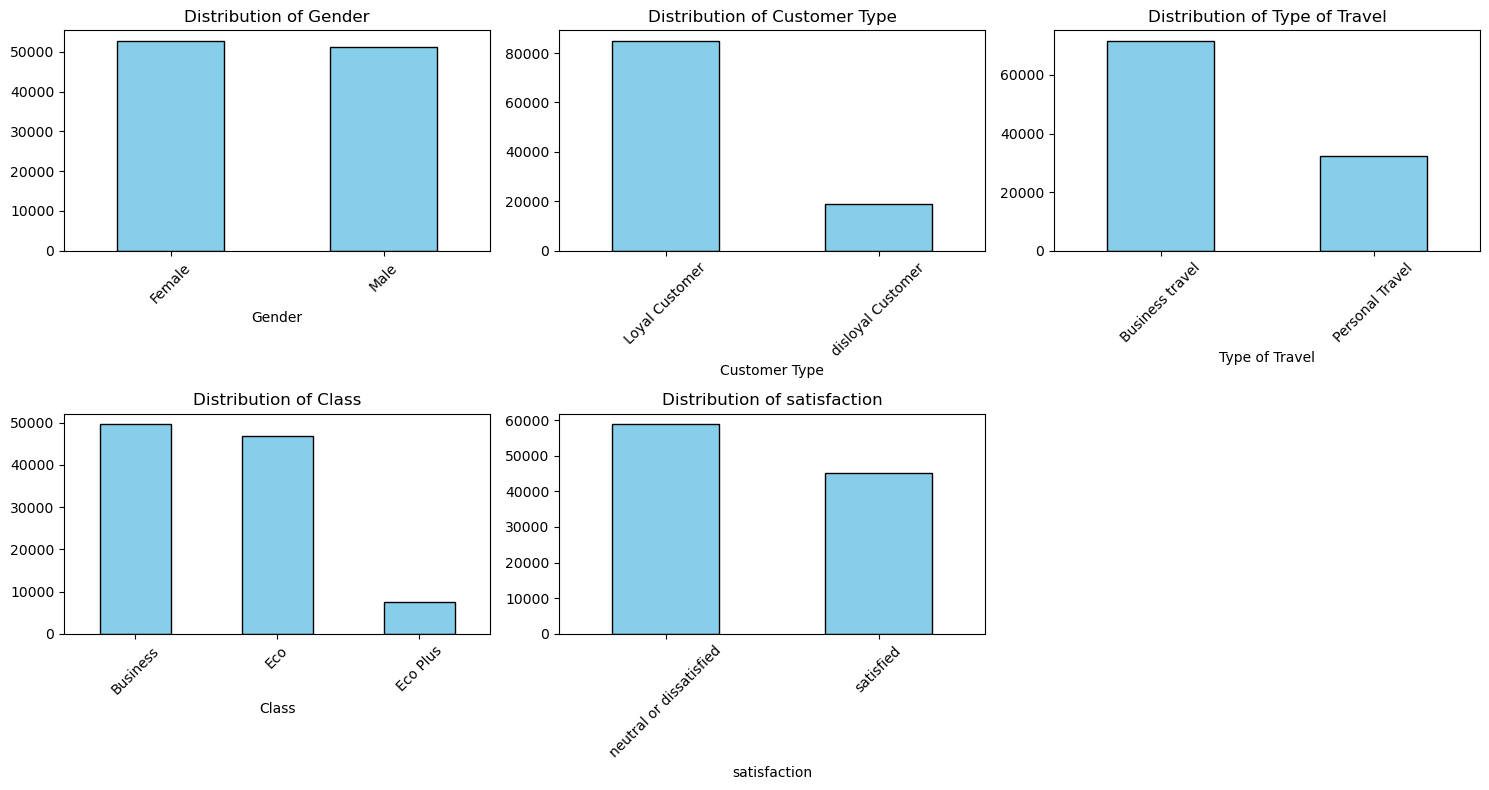

In [221]:
# 3. Data Visualization

# --- 3.1 Bar Charts for Categorical Variables ---
# Plot the distribution of each categorical variable to understand the data composition
plt.figure(figsize=(15, 8))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)
    df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

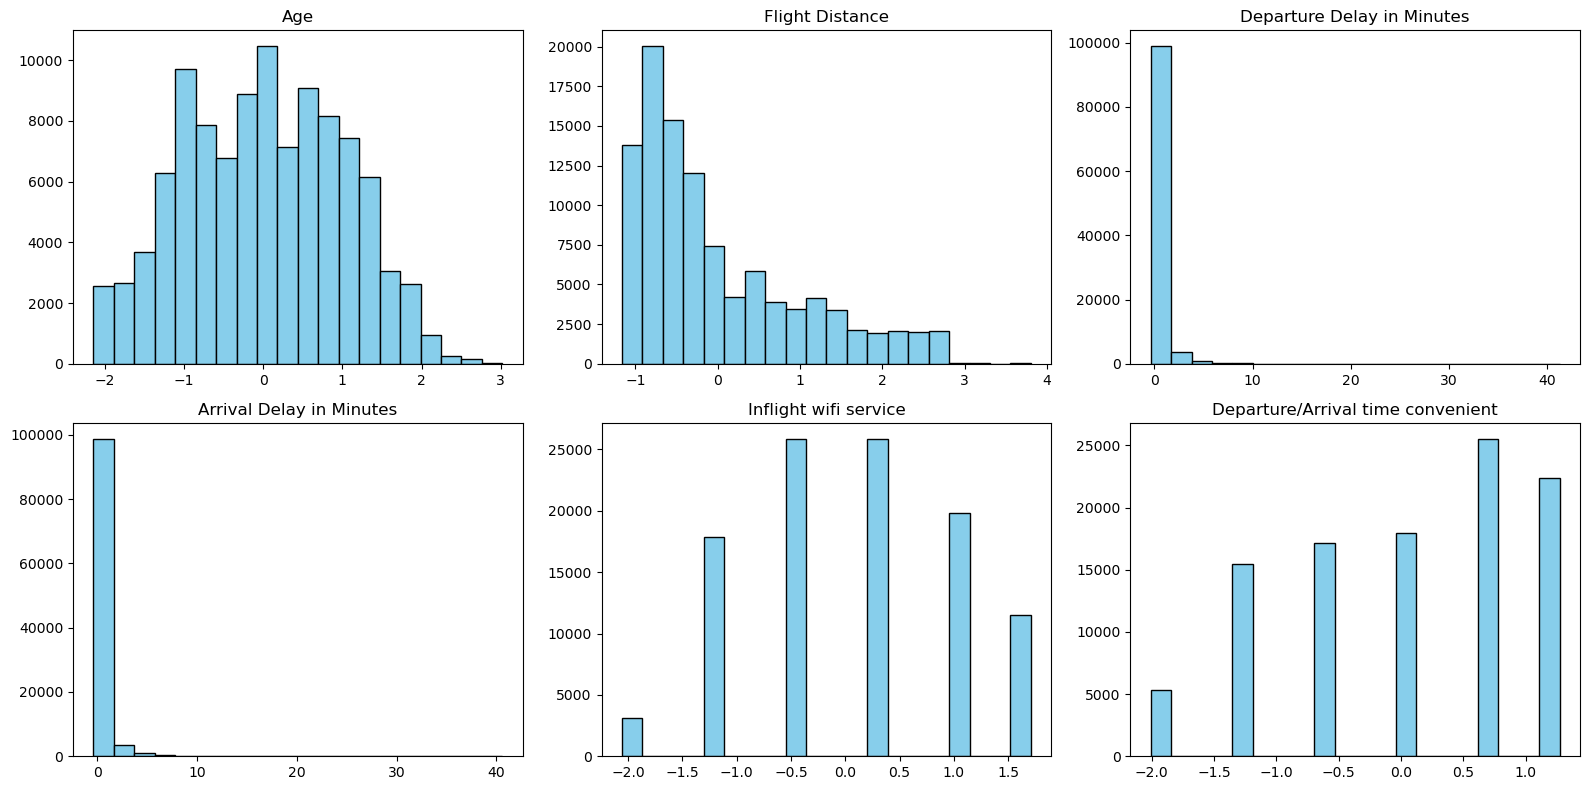

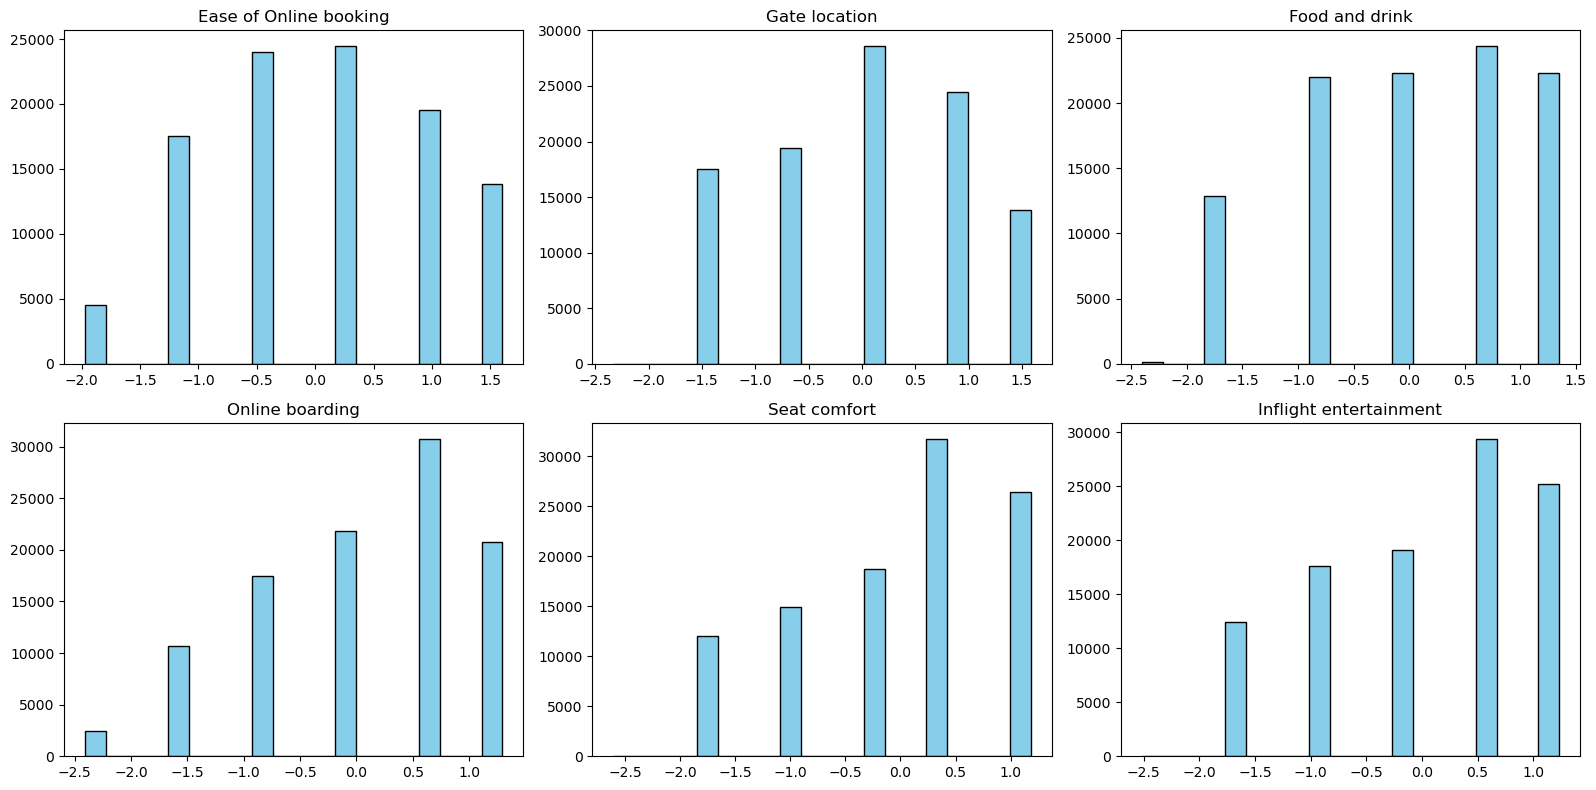

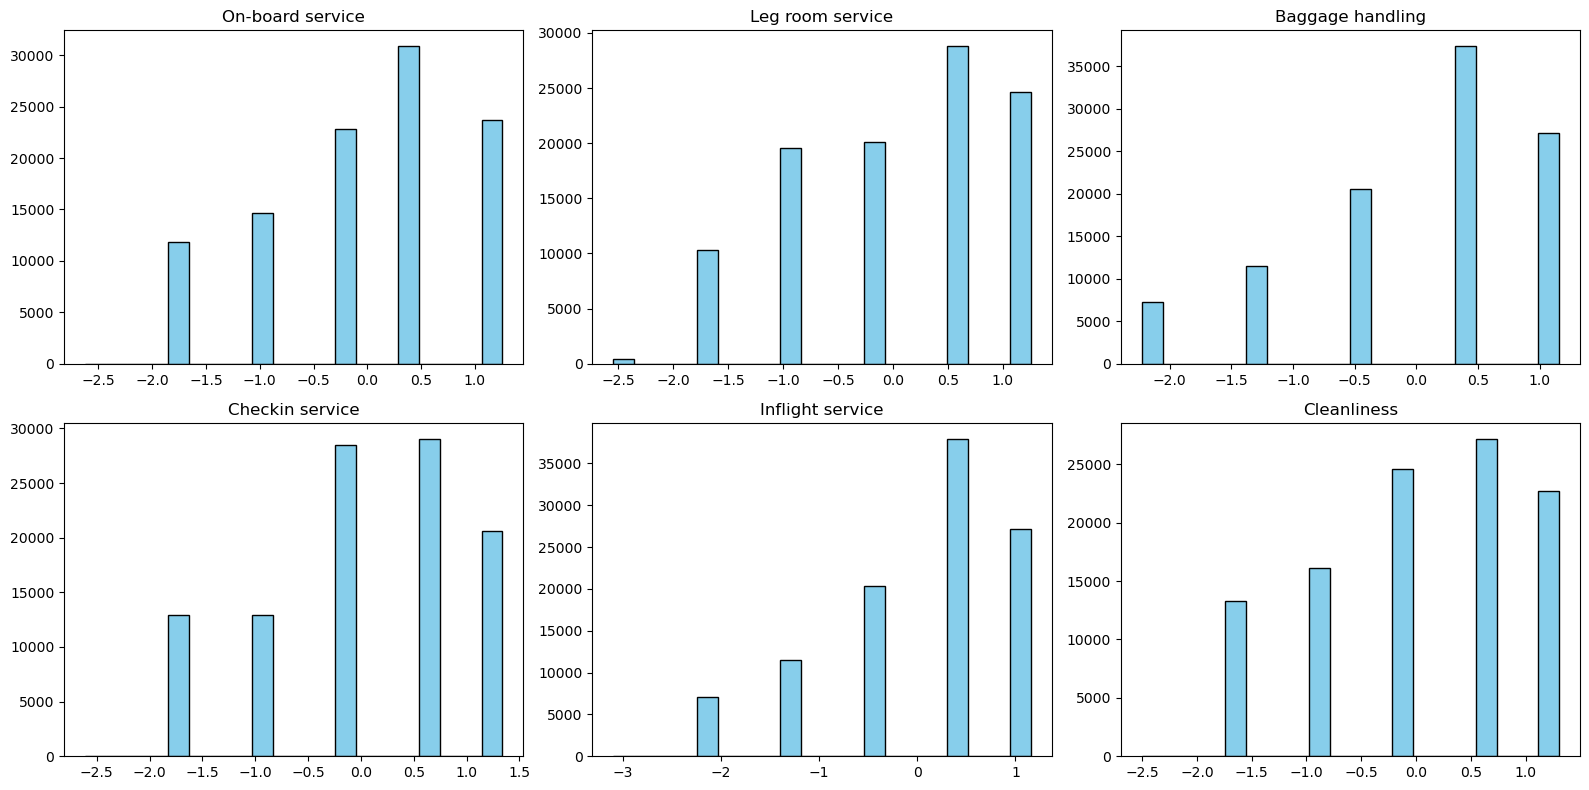

<Figure size 1600x800 with 0 Axes>

In [222]:
# --- 3.2 Histograms for Numeric Features ---
# Plot histograms in groups to visualize distributions of each numeric feature
num_cols_per_plot = 6
num_plots = len(num_cols) // num_cols_per_plot + 1
start_idx = 0
for p in range(num_plots):
    plt.figure(figsize=(16, 8))
    for i in range(num_cols_per_plot):
        idx = start_idx + i
        if idx >= len(num_cols):
            break
        plt.subplot(2, num_cols_per_plot//2, i+1)
        plt.hist(df[num_cols[idx]], bins=20, color='skyblue', edgecolor='black')
        plt.title(num_cols[idx])
    start_idx += num_cols_per_plot
    plt.tight_layout()
    plt.show()

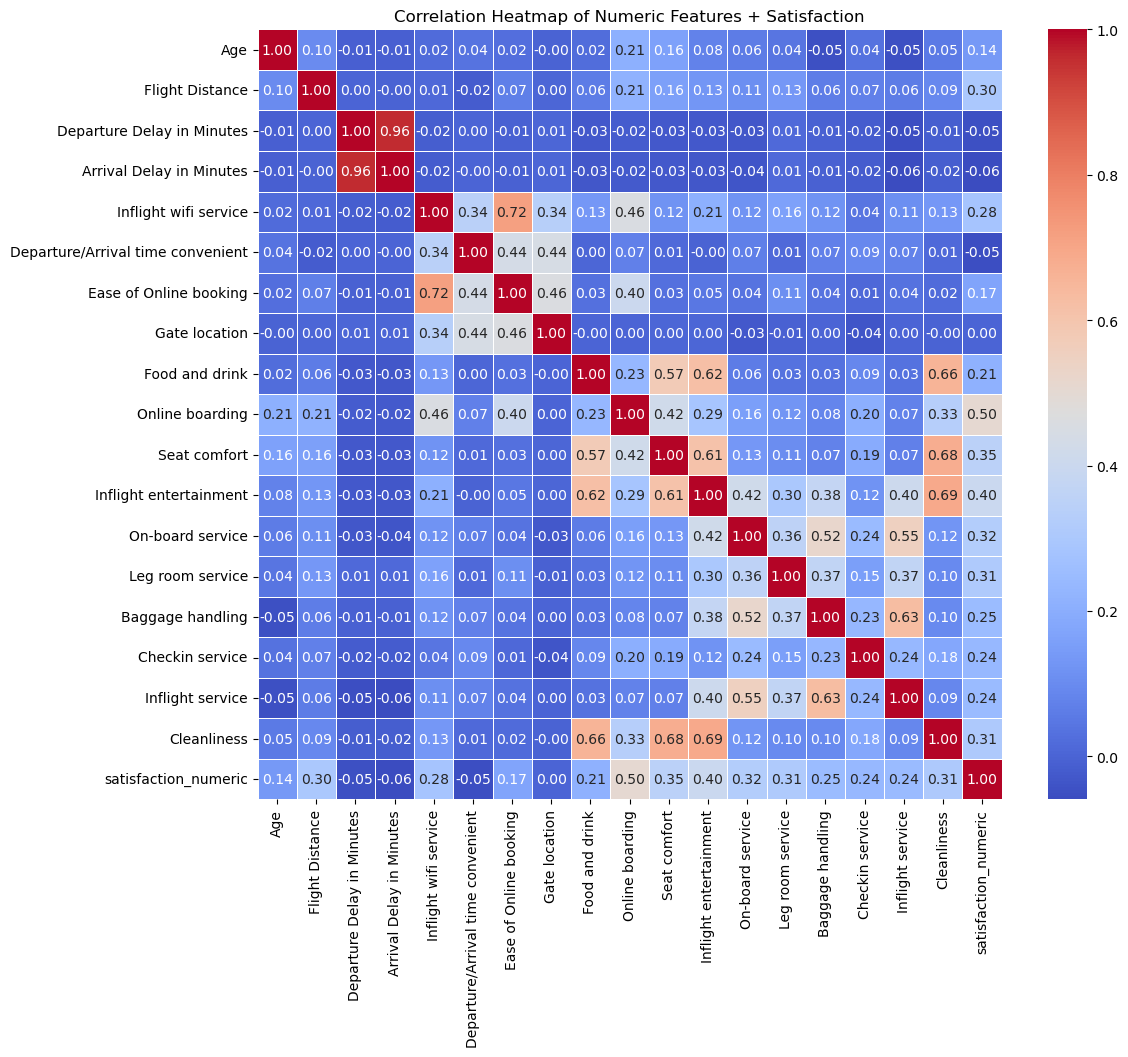

In [223]:
# --- 3.3 Correlation Heatmap ---
# Create a heatmap to see correlations between numeric features and satisfaction
all_numeric = num_cols + ['satisfaction_numeric']
corr_matrix = df[all_numeric].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features + Satisfaction")
plt.show()

# Correlation Table as DataFrame
# print("Correlation Matrix as DataFrame:")
# print(corr_matrix)

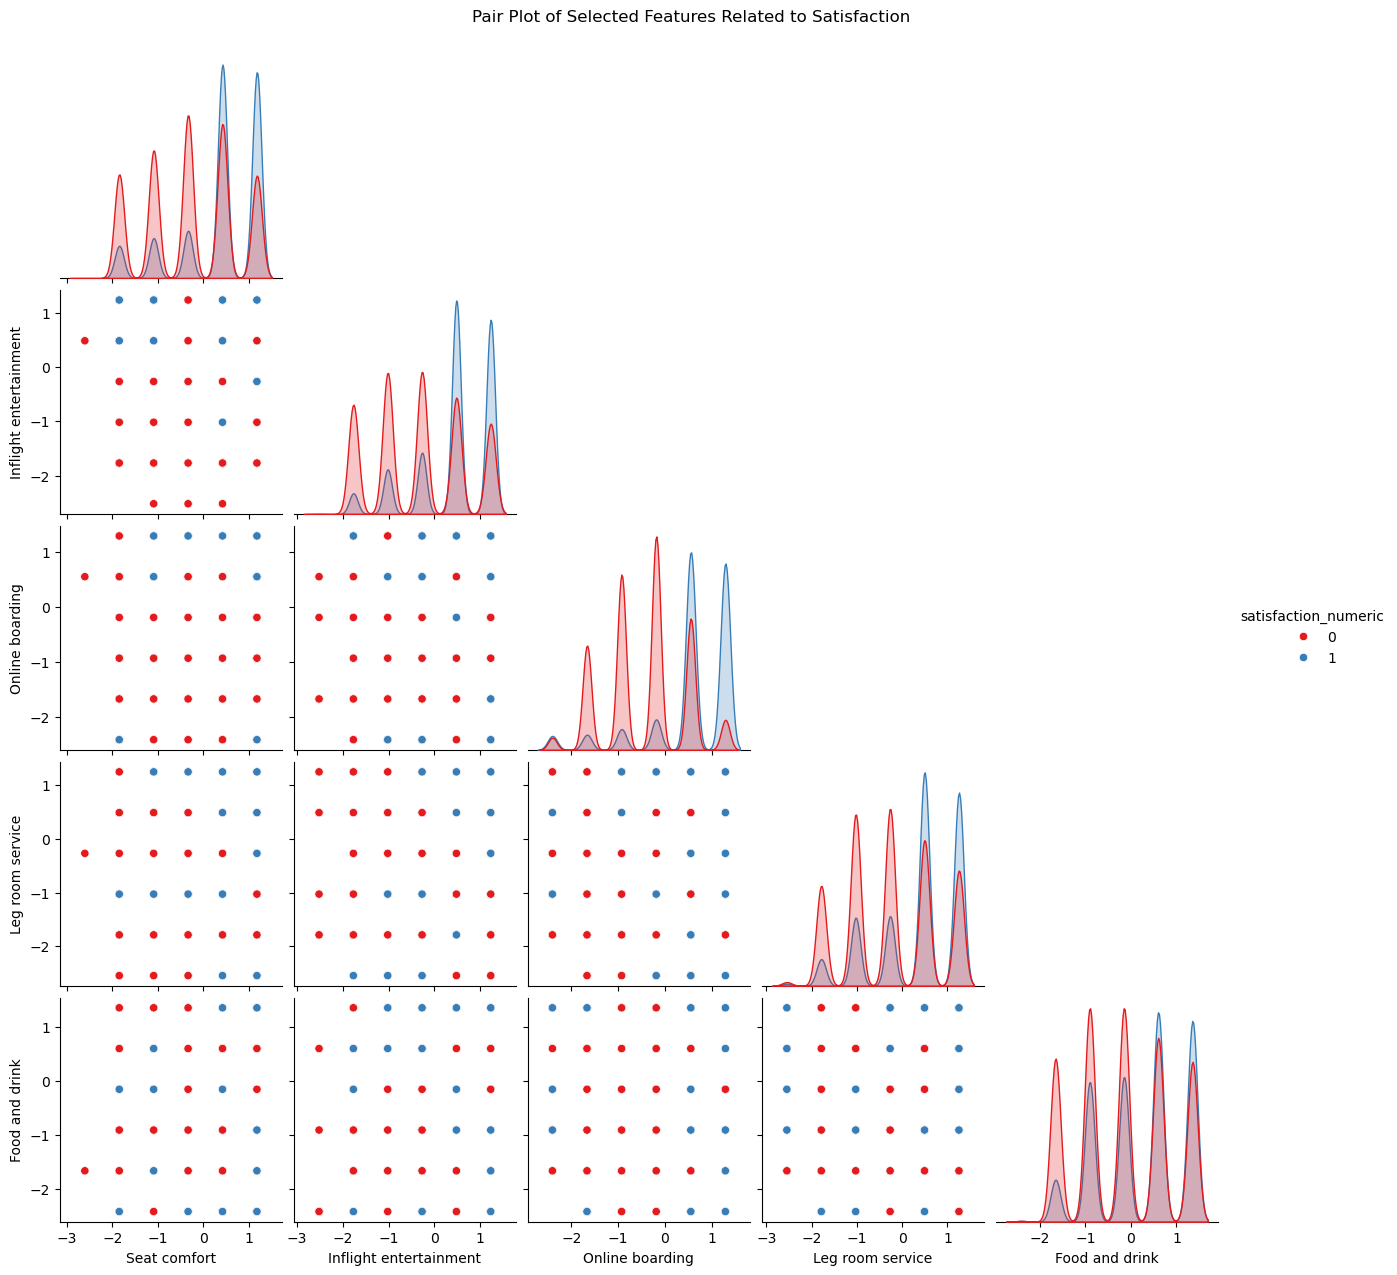

In [224]:
# --- 3.4 Pair Plot ---
# Visualize pairwise relationships for selected features that may influence satisfaction
pairplot_features = [
    'satisfaction_numeric',
    'Seat comfort',
    'Inflight entertainment',
    'Online boarding',
    'Leg room service',
    'Food and drink'
]
sns.pairplot(df[pairplot_features], hue='satisfaction_numeric', corner=True, palette='Set1')
plt.suptitle("Pair Plot of Selected Features Related to Satisfaction", y=1.02)
plt.show()

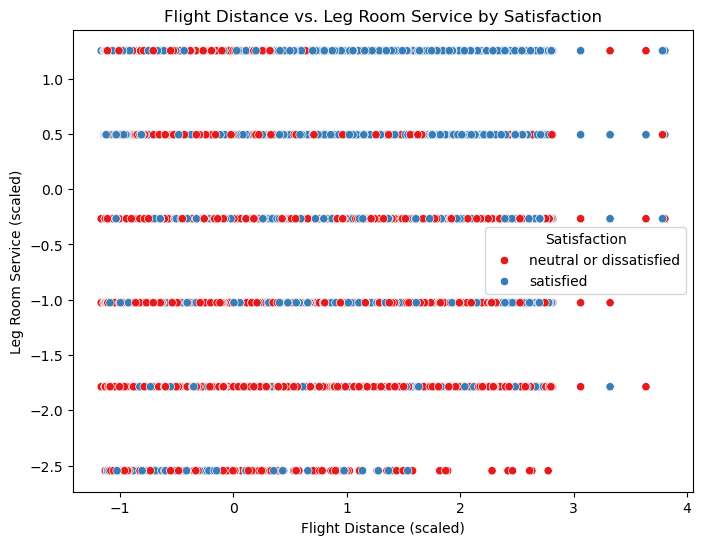

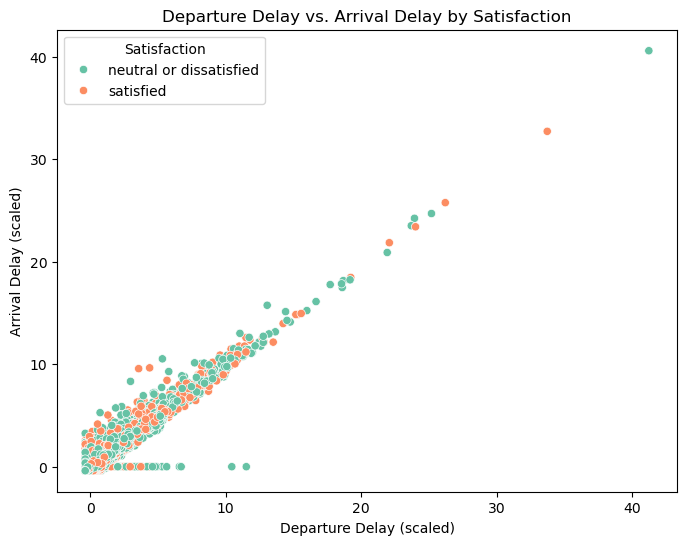

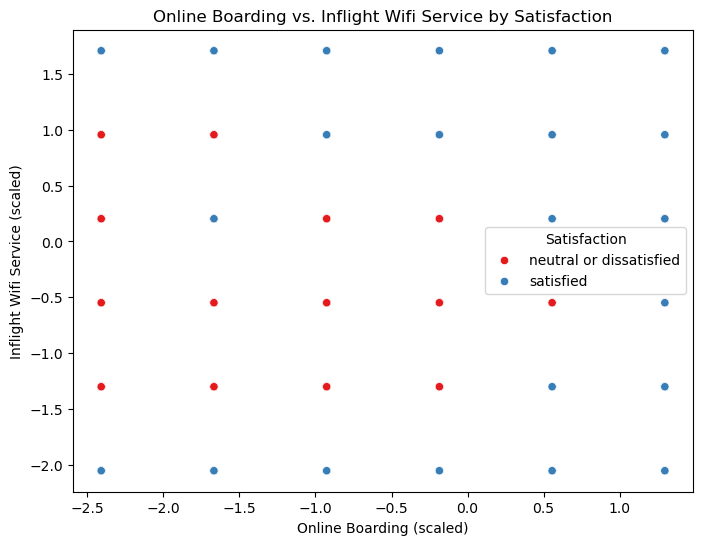

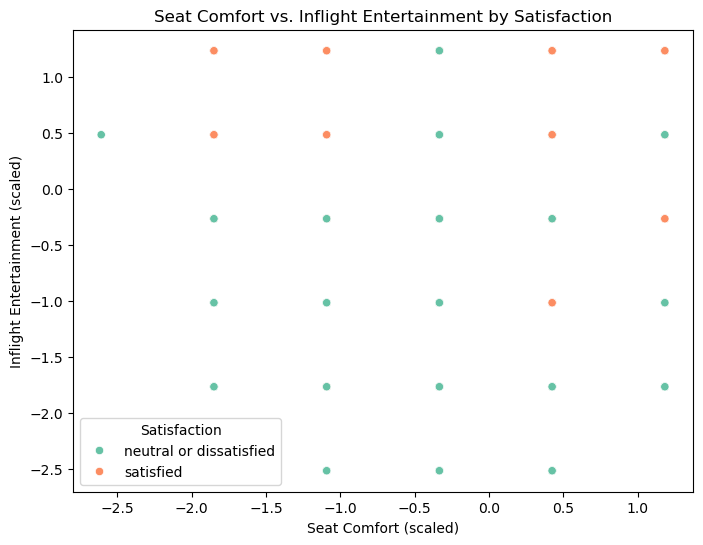

In [225]:
# --- 3.5 Scatter Plots ---
# Create scatter plots to explore relationships between selected variables, colored by satisfaction

# (A) Flight Distance vs. Leg Room Service
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Flight Distance', y='Leg room service', hue='satisfaction', palette='Set1')
plt.title("Flight Distance vs. Leg Room Service by Satisfaction")
plt.xlabel("Flight Distance (scaled)")
plt.ylabel("Leg Room Service (scaled)")
plt.legend(title='Satisfaction')
plt.show()

# (B) Departure Delay vs. Arrival Delay
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Departure Delay in Minutes', y='Arrival Delay in Minutes', hue='satisfaction', palette='Set2')
plt.title("Departure Delay vs. Arrival Delay by Satisfaction")
plt.xlabel("Departure Delay (scaled)")
plt.ylabel("Arrival Delay (scaled)")
plt.legend(title='Satisfaction')
plt.show()

# (C) Online Boarding vs. Inflight Wifi Service
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Online boarding', y='Inflight wifi service', hue='satisfaction', palette='Set1')
plt.title("Online Boarding vs. Inflight Wifi Service by Satisfaction")
plt.xlabel("Online Boarding (scaled)")
plt.ylabel("Inflight Wifi Service (scaled)")
plt.legend(title='Satisfaction')
plt.show()

# (D) Seat Comfort vs. Inflight Entertainment
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Seat comfort', y='Inflight entertainment', hue='satisfaction', palette='Set2')
plt.title("Seat Comfort vs. Inflight Entertainment by Satisfaction")
plt.xlabel("Seat Comfort (scaled)")
plt.ylabel("Inflight Entertainment (scaled)")
plt.legend(title='Satisfaction')
plt.show()


In [226]:
### Question 1b ###

In [227]:
# 4. Encode Categorical Features for Clustering

# For clustering, convert all categorical features into numeric values.
# Create a dictionary to store each LabelEncoder for later use.
label_encoders = {}

# Apply Label Encoding to each categorical column
for col in cat_cols:
    le = LabelEncoder() # Initialize a LabelEncoder instance
    df[col] = le.fit_transform(df[col]) # Encode the categorical column
    label_encoders[col] = le # store the encoder for later reference

# Print the mapping for each categorical column
for col in cat_cols:
    print(f"{col}: {list(label_encoders[col].classes_)}")

Gender: ['Female', 'Male']
Customer Type: ['Loyal Customer', 'disloyal Customer']
Type of Travel: ['Business travel', 'Personal Travel']
Class: ['Business', 'Eco', 'Eco Plus']
satisfaction: ['neutral or dissatisfied', 'satisfied']


In [228]:
# 5. K-means Clustering

# --- 5.1 Combine Features for Clustering ---
# Use both the scaled numeric features and the encoded categorical features.
all_features = num_cols + cat_cols
X = df[all_features].values  # Create a full numeric feature matrix

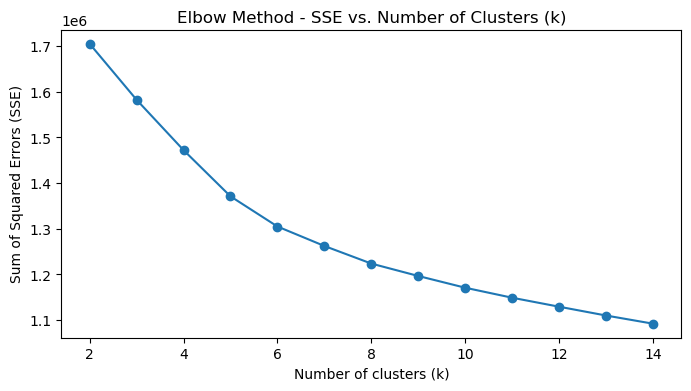

In [210]:
# --- 5.2 Determine the Optimal Number of Clusters ---

# (A) Elbow Method: Calculate SSE for a range of k values
sse = []  # sum of squared distances to cluster centers

# Define a range of possible cluster numbers to test
K_range = range(2, 15)  # Adjust this range

# Iterate over different values of k to compute SSE
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=50) # Initialize KMeans with k clusters
    kmeans.fit(X) # Fit KMeans to the dataset
    sse.append(kmeans.inertia_) # Store the inertia

# Plot SSE against the number of clusters to visualize the "elbow"
plt.figure(figsize=(8, 4))
plt.plot(list(K_range), sse, marker='o') # Line plot with markers
plt.title("Elbow Method - SSE vs. Number of Clusters (k)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.show()

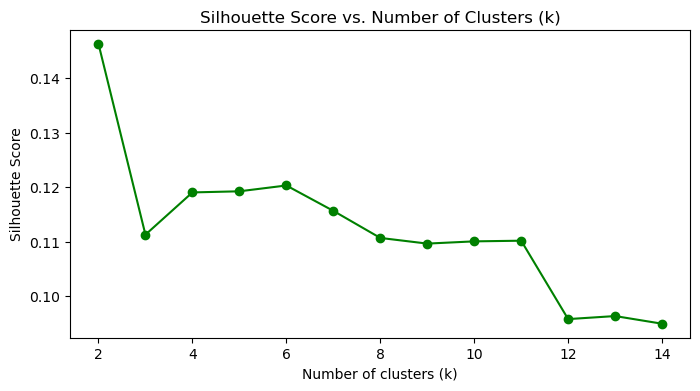

In [90]:
# (B) Silhouette Score: Evaluate cluster quality for each k

# Define the range of cluster numbers to evaluate
K_range = range(2, 15) # Adjust this range

# List to store silhouette scores for each k
sil_scores = []

# Iterate over different values of k to compute the silhouette score
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=50) # Initialize KMeans with k clusters
    labels = kmeans.fit_predict(X) # Assign each data point to a cluster
    score = silhouette_score(X, labels) # Calculate the silhouette score
    sil_scores.append(score) # Store the score for analysis

# Plot the silhouette scores against the number of clusters
plt.figure(figsize=(8, 4))
plt.plot(list(K_range), sil_scores, marker='o', color='green') # Line plot with markers
plt.title("Silhouette Score vs. Number of Clusters (k)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

In [229]:
# --- 5.3 Final K-means Clustering ---
# Select an optimal number of clusters (based on plots)
optimal_k = 6

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42) # Initialize the final KMeans model
cluster_labels = kmeans_final.fit_predict(X) # Fit the KMeans model to the data
df['Cluster'] = cluster_labels  # Assign cluster labels to the DataFrame

# Display the number of data points in each cluster to understand the distribution
print("\nCluster Counts:")
print(df['Cluster'].value_counts())


Cluster Counts:
Cluster
3    23840
1    20676
0    20149
2    19257
4    16631
5     3351
Name: count, dtype: int64


In [230]:
# 6. Cluster Analysis and Interpretation

# --- 6.1 Cluster Summary ---
# Calculate average (scaled) feature values for each cluster
cluster_summary = df.groupby('Cluster')[all_features].mean()
print("\nCluster Feature Averages:")
print(cluster_summary)


Cluster Feature Averages:
              Age  Flight Distance  Departure Delay in Minutes  \
Cluster                                                          
0       -0.466560        -0.494295                   -0.138775   
1       -0.467157        -0.321487                   -0.113693   
2        0.487375         0.015081                   -0.119173   
3        0.144183         0.165864                   -0.162381   
4        0.382428         0.749894                   -0.156433   
5       -0.036770        -0.032682                    4.152378   

         Arrival Delay in Minutes  Inflight wifi service  \
Cluster                                                    
0                       -0.136480              -0.442410   
1                       -0.108649              -0.272962   
2                       -0.114546              -0.128882   
3                       -0.167700               1.113790   
4                       -0.164535              -0.568598   
5                       

In [231]:
# --- 6.2 Analyze Categorical Distributions ---
# First, examine pivot tables for the encoded version of categorical features

# Loop through each categorical column to compute and display the cluster-wise distribution
for c in cat_cols:
    print(f"\nCluster Distribution for {c} (Pivoted Table):")
    
    # 1. Compute proportions by cluster
    dist_table = (
        df.groupby('Cluster')[c] # Group by cluster and categorical column.
          .value_counts(normalize=True) # Get category proportions within each cluster
          .rename('proportion') # Rename column for clarity
          .reset_index() # Convert back to DataFrame format
    )
    
    # 2. Pivot so that each cluster is a row, and each encoded category is a column
    pivoted = dist_table.pivot(
        index='Cluster',  # Rows are clusters
        columns=c,  # Columns are the encoded categories
        values='proportion' # Values are the proportions
    ).fillna(0)

    # Print the pivot table for the current categorical feature
    print(pivoted)


Cluster Distribution for Gender (Pivoted Table):
Gender          0         1
Cluster                    
0        0.491290  0.508710
1        0.451780  0.548220
2        0.583892  0.416108
3        0.502978  0.497022
4        0.513559  0.486441
5        0.510594  0.489406

Cluster Distribution for Customer Type (Pivoted Table):
Customer Type         0         1
Cluster                          
0              0.664897  0.335103
1              0.678855  0.321145
2              0.916913  0.083087
3              0.874958  0.125042
4              0.978294  0.021706
5              0.806923  0.193077

Cluster Distribution for Type of Travel (Pivoted Table):
Type of Travel         0         1
Cluster                           
0               0.448260  0.551740
1               0.566792  0.433208
2               0.669523  0.330477
3               0.821980  0.178020
4               0.966929  0.033071
5               0.696509  0.303491

Cluster Distribution for Class (Pivoted Table):
Class     

In [232]:
# --- 6.3 Decode Categorical Features for Clearer Interpretation ---
# Create new decoded columns so you can view the original category names
# 1. Decode Each Categorical Column
for col in cat_cols:
    decoded_col = col + "_decoded"  # Name of the new decoded column
    df[decoded_col] = label_encoders[col].inverse_transform(df[col].values) # Decode numeric values back to categories

# 2. Create Pivot Tables for Each Decoded Column
# Dictionary to store pivot tables for each decoded column
decoded_pivot_tables = {}

# Loop through each original categorical column (now also decoded)
for col in cat_cols:
    decoded_col = col + "_decoded"
    
    # Compute distribution of each decoded category within each cluster
    dist_table = (
        df.groupby('Cluster')[decoded_col]
          .value_counts(normalize=True) # Proportion of each category within the cluster
          .rename('proportion') # Rename the calculated column
          .reset_index() # Convert back to DataFrame format
    )
    
    # Pivot the table so that each Cluster is a row, each decoded category is a column
    pivoted = dist_table.pivot(
        index='Cluster', 
        columns=decoded_col, 
        values='proportion'
    ).fillna(0)  # fill any missing categories with 0

    # Store Decoded Pivot Tables in a Dictionary
    decoded_pivot_tables[decoded_col] = pivoted
    
    # Print the pivot table
    print(f"\nCluster vs. {decoded_col} (Pivoted Table):")
    print(pivoted)



Cluster vs. Gender_decoded (Pivoted Table):
Gender_decoded    Female      Male
Cluster                           
0               0.491290  0.508710
1               0.451780  0.548220
2               0.583892  0.416108
3               0.502978  0.497022
4               0.513559  0.486441
5               0.510594  0.489406

Cluster vs. Customer Type_decoded (Pivoted Table):
Customer Type_decoded  Loyal Customer  disloyal Customer
Cluster                                                 
0                            0.664897           0.335103
1                            0.678855           0.321145
2                            0.916913           0.083087
3                            0.874958           0.125042
4                            0.978294           0.021706
5                            0.806923           0.193077

Cluster vs. Type of Travel_decoded (Pivoted Table):
Type of Travel_decoded  Business travel  Personal Travel
Cluster                                                 


In [ ]:
### Question 1c ###

In [233]:
# --- 6.4 Interpret Clusters ---
def interpret_clusters(
    cluster_summary, # DataFrame containing cluster-level means for all features (scaled for numeric features).
    decoded_pivot_tables, # Dictionary of pivot tables showing categorical distributions across clusters.
    numeric_features=num_cols, # List of numeric columns to analyze.
    numeric_threshold=0.5  # Threshold (in scaled units) to determine if a numeric feature is "notably high/low".
):
    
    """
    Interpret each cluster by summarizing:
      1) Significant numeric features (those with scaled means significantly above or below the threshold).
      2) Most common categories for each categorical column (decoded for readability).
    """

    # Sort clusters to ensure consistent order across multiple runs.
    sorted_clusters = sorted(cluster_summary.index.unique())

    # Loop through each cluster to generate its interpretation.
    for cluster_id in sorted_clusters:
        print(f"\n=== Interpretation for Cluster {cluster_id} ===")
        
        # 1) Numeric Features: Identify large positive or negative means
        row = cluster_summary.loc[cluster_id, numeric_features]
        print("  Numeric Feature Highlights (scaled means):")
        for feature, mean_val in row.items():
            # Check if cluster mean is above or below the threshold
            if mean_val > numeric_threshold:
                print(f"    * {feature} is notably HIGH (scaled mean = {mean_val:.2f})")
            elif mean_val < -numeric_threshold:
                print(f"    * {feature} is notably LOW (scaled mean = {mean_val:.2f})")
        
        # 2) Categorical Features: Report the top two categories from each decoded pivot table.
        print("\n  Top Categories in Decoded Pivot Tables:")
        for decoded_col, pivot_table in decoded_pivot_tables.items():
            # pivot_table is shape (n_clusters, categories)
            # Get the distribution for this specific cluster, sorted descending
            cat_distribution = pivot_table.loc[cluster_id].sort_values(ascending=False)
            # Grab top 2 categories
            top_categories = cat_distribution.head(2)
            print(f"    {decoded_col} - top categories:")
            for cat_val, proportion in top_categories.items():
                print(f"      '{cat_val}' with proportion = {proportion:.2f}")

In [234]:
# Call the interpretation function using our cluster summary and pivot tables
interpret_clusters(
    cluster_summary=cluster_summary,
    decoded_pivot_tables=decoded_pivot_tables,
    numeric_features=num_cols,
    numeric_threshold=0.5  # Adjust threshold
)

# 3) Potential Recommendations or Insights
print("\n  [Potential Insights & Recommendations]")
print("  - Leverage features that are significantly HIGH to maintain or improve satisfaction.")
print("  - Investigate and address features that are notably LOW to reduce dissatisfaction.")
print("  - Tailor services or marketing strategies based on the top categories within each cluster.")


=== Interpretation for Cluster 0 ===
  Numeric Feature Highlights (scaled means):
    * Ease of Online booking is notably LOW (scaled mean = -0.60)
    * Food and drink is notably HIGH (scaled mean = 0.61)
    * Online boarding is notably LOW (scaled mean = -0.79)
    * Inflight entertainment is notably HIGH (scaled mean = 0.54)
    * Cleanliness is notably HIGH (scaled mean = 0.54)

  Top Categories in Decoded Pivot Tables:
    Gender_decoded - top categories:
      'Male' with proportion = 0.51
      'Female' with proportion = 0.49
    Customer Type_decoded - top categories:
      'Loyal Customer' with proportion = 0.66
      'disloyal Customer' with proportion = 0.34
    Type of Travel_decoded - top categories:
      'Personal Travel' with proportion = 0.55
      'Business travel' with proportion = 0.45
    Class_decoded - top categories:
      'Eco' with proportion = 0.72
      'Business' with proportion = 0.18
    satisfaction_decoded - top categories:
      'neutral or dissatisf

In [ ]:
### Question 1d ###

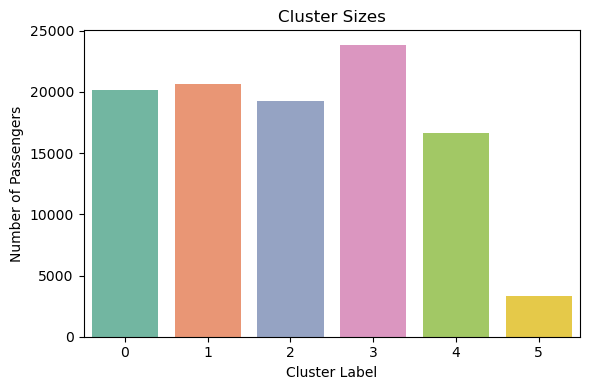

In [235]:
# 7. Visualizing Cluster Sizes and Dimensionality Reduction

# --- 7.1 Cluster Size Bar Chart ---
# Calculate the number of data points (passengers) in each cluster.
cluster_counts = df['Cluster'].value_counts().sort_index()
counts_df = cluster_counts.reset_index() # Convert the counts into a DataFrame for easier plotting with seaborn.
counts_df.columns = ['Cluster', 'Count']  # rename columns for clarity

plt.figure(figsize=(6, 4))
sns.barplot(
    data=counts_df, 
    x='Cluster', 
    y='Count', 
    hue='Cluster',    # Ensures different colors for each cluster.
    palette='Set2',   # your desired color palette
    dodge=False       # place bars exactly at x positions (no grouping offset)
)
plt.legend([], [], frameon=False) # Hide the legend since it's redundant (colors already match x-axis labels).
plt.title("Cluster Sizes")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Passengers")
plt.tight_layout()
plt.show()

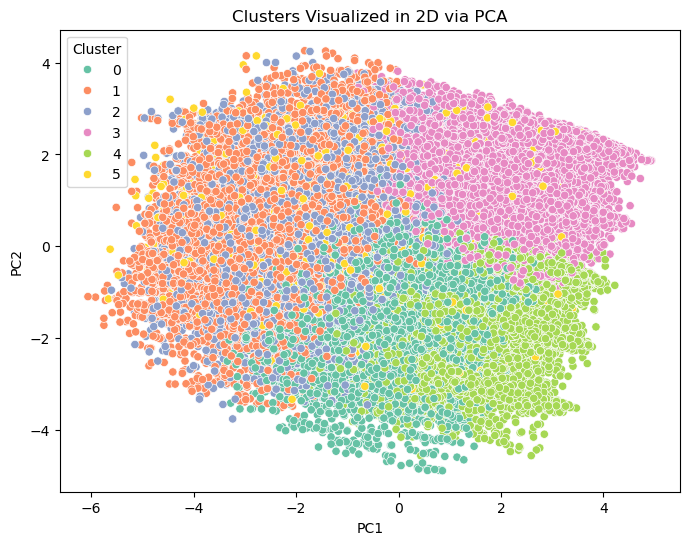

In [236]:
# --- 7.2 Visualize Clusters in 2D via PCA ---
# Due to the high dimensionality, we reduce the dataset to 2 principal components
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X) # X_pca will have shape (n_samples, 2)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='Set2') # Color by cluster label
plt.title("Clusters Visualized in 2D via PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Cluster')
plt.show()

In [ ]:
# End